# Housing Company Price Prediction

## Problem Statement

**A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price.**

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:

**.)** Which variables are significant in predicting the price of a house, and

**.)** How well those variables describe the price of a house.

Also, determine the optimal value of lambda for ridge and lasso regression.

 

***Business Goal:***

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [1]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import RFE
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

# Import warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Loading the dataset
house = pd.read_csv("train.csv")
house

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
# Checking the shape of the dataset
house.shape

(1460, 81)

In [4]:
# Checking the information of dataset
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
# Checking the statistical information
house.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
# Checking for the null values
house.isnull().sum().sort_values(ascending=False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
                 ... 
CentralAir          0
SaleCondition       0
Heating             0
TotalBsmtSF         0
Id                  0
Length: 81, dtype: int64

In [7]:
round(house.isnull().sum()/len(house.index),2).sort_values(ascending=False)

PoolQC          1.00
MiscFeature     0.96
Alley           0.94
Fence           0.81
FireplaceQu     0.47
                ... 
BsmtHalfBath    0.00
FullBath        0.00
HalfBath        0.00
BedroomAbvGr    0.00
Id              0.00
Length: 81, dtype: float64

### Missing Value Imputation
Values are not missing in the categorical columns NA means No Access or similar to columns. So imputing, acccording to the data dictionary provided.

In [8]:
# Imputing categorical variables
house['PoolQC'].fillna('No Pool', inplace=True)
house['MiscFeature'].fillna('None', inplace=True)
house['Alley'].fillna('No Alley Access', inplace=True)
house['Fence'].fillna('No Fence', inplace=True)
house['FireplaceQu'].fillna('No Fireplace', inplace=True)
house['GarageCond'].fillna('No Garage', inplace=True)
house['GarageType'].fillna('No Garage', inplace=True)
house['GarageFinish'].fillna('No Garage', inplace=True)
house['GarageQual'].fillna('No Garage', inplace=True)
house['BsmtExposure'].fillna('No Basement', inplace=True)
house['BsmtFinType2'].fillna('No Basement', inplace=True)
house['BsmtFinType1'].fillna('No Basement', inplace=True)
house['BsmtCond'].fillna('No Basement', inplace=True)
house['BsmtQual'].fillna('No Basement', inplace=True)
house['MasVnrType'].fillna('None', inplace=True)
house['Electrical'].fillna('Mix', inplace=True)

In [9]:
# Imputing numerical variables
house["LotFrontage"] =house.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))
house['MasVnrArea'].fillna(0, inplace=True)

In [10]:
# Dropping redundant columns
house.drop(['Id','GarageYrBlt'],axis=1,inplace=True)

In [11]:
house.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,No Alley Access,Reg,Lvl,AllPub,Inside,...,0,No Pool,No Fence,None,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,No Alley Access,Reg,Lvl,AllPub,FR2,...,0,No Pool,No Fence,None,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,No Alley Access,IR1,Lvl,AllPub,Inside,...,0,No Pool,No Fence,None,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,No Alley Access,IR1,Lvl,AllPub,Corner,...,0,No Pool,No Fence,None,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,No Alley Access,IR1,Lvl,AllPub,FR2,...,0,No Pool,No Fence,None,0,12,2008,WD,Normal,250000


In [12]:
# checking for NA values in cloumns again
house.isnull().sum().sort_values(ascending=False)

SalePrice       0
Foundation      0
RoofMatl        0
Exterior1st     0
Exterior2nd     0
               ..
TotRmsAbvGrd    0
Functional      0
Fireplaces      0
FireplaceQu     0
MSSubClass      0
Length: 79, dtype: int64

In [13]:
#checking the shape of Dataframe again
house.shape

(1460, 79)

In [14]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [15]:
# checking of numerical variables
house._get_numeric_data().columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [16]:
# There are some variables that should be in categorical
house['MSSubClass']=house['MSSubClass'].astype('object')
house['OverallQual']=house['OverallQual'].astype('object')
house['OverallCond']=house['OverallCond'].astype('object')
house['MoSold']=house['MoSold'].astype('object')
house['YrSold']=house['YrSold'].astype('object')
house['YearBuilt']=house['YearBuilt'].astype('object')
house['YearRemodAdd']=house['YearRemodAdd'].astype('object')

In [17]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   object 
 17  OverallCond    1460 non-null   object 
 18  YearBuil

In [18]:
# Total Bathroom's
house['Total Bathrooms']=((house['BsmtFullBath'])+(house['FullBath'])+(house['BsmtHalfBath']/2)+(house['HalfBath']/2))

In [19]:
#Total surface area of house
house['Total SF']=(house['TotalBsmtSF']+house['1stFlrSF']+house['2ndFlrSF'])

In [20]:
house.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Total Bathrooms,Total SF
0,60,RL,65.0,8450,Pave,No Alley Access,Reg,Lvl,AllPub,Inside,...,No Fence,None,0,2,2008,WD,Normal,208500,3.5,2566
1,20,RL,80.0,9600,Pave,No Alley Access,Reg,Lvl,AllPub,FR2,...,No Fence,None,0,5,2007,WD,Normal,181500,2.5,2524
2,60,RL,68.0,11250,Pave,No Alley Access,IR1,Lvl,AllPub,Inside,...,No Fence,None,0,9,2008,WD,Normal,223500,3.5,2706
3,70,RL,60.0,9550,Pave,No Alley Access,IR1,Lvl,AllPub,Corner,...,No Fence,None,0,2,2006,WD,Abnorml,140000,2.0,2473
4,60,RL,84.0,14260,Pave,No Alley Access,IR1,Lvl,AllPub,FR2,...,No Fence,None,0,12,2008,WD,Normal,250000,3.5,3343


# Univaraite Analysis

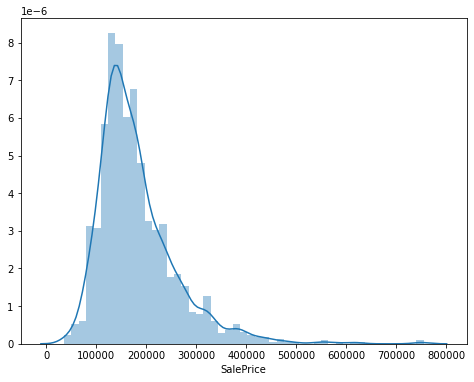

In [21]:
plt.figure(figsize=(8,6))
sns.distplot(house['SalePrice'])

**1) From the above plot we can say that majority of the houses are between 50000 and 250000 price ranges**

**2) Some houses are having very high price ranges like 800000**

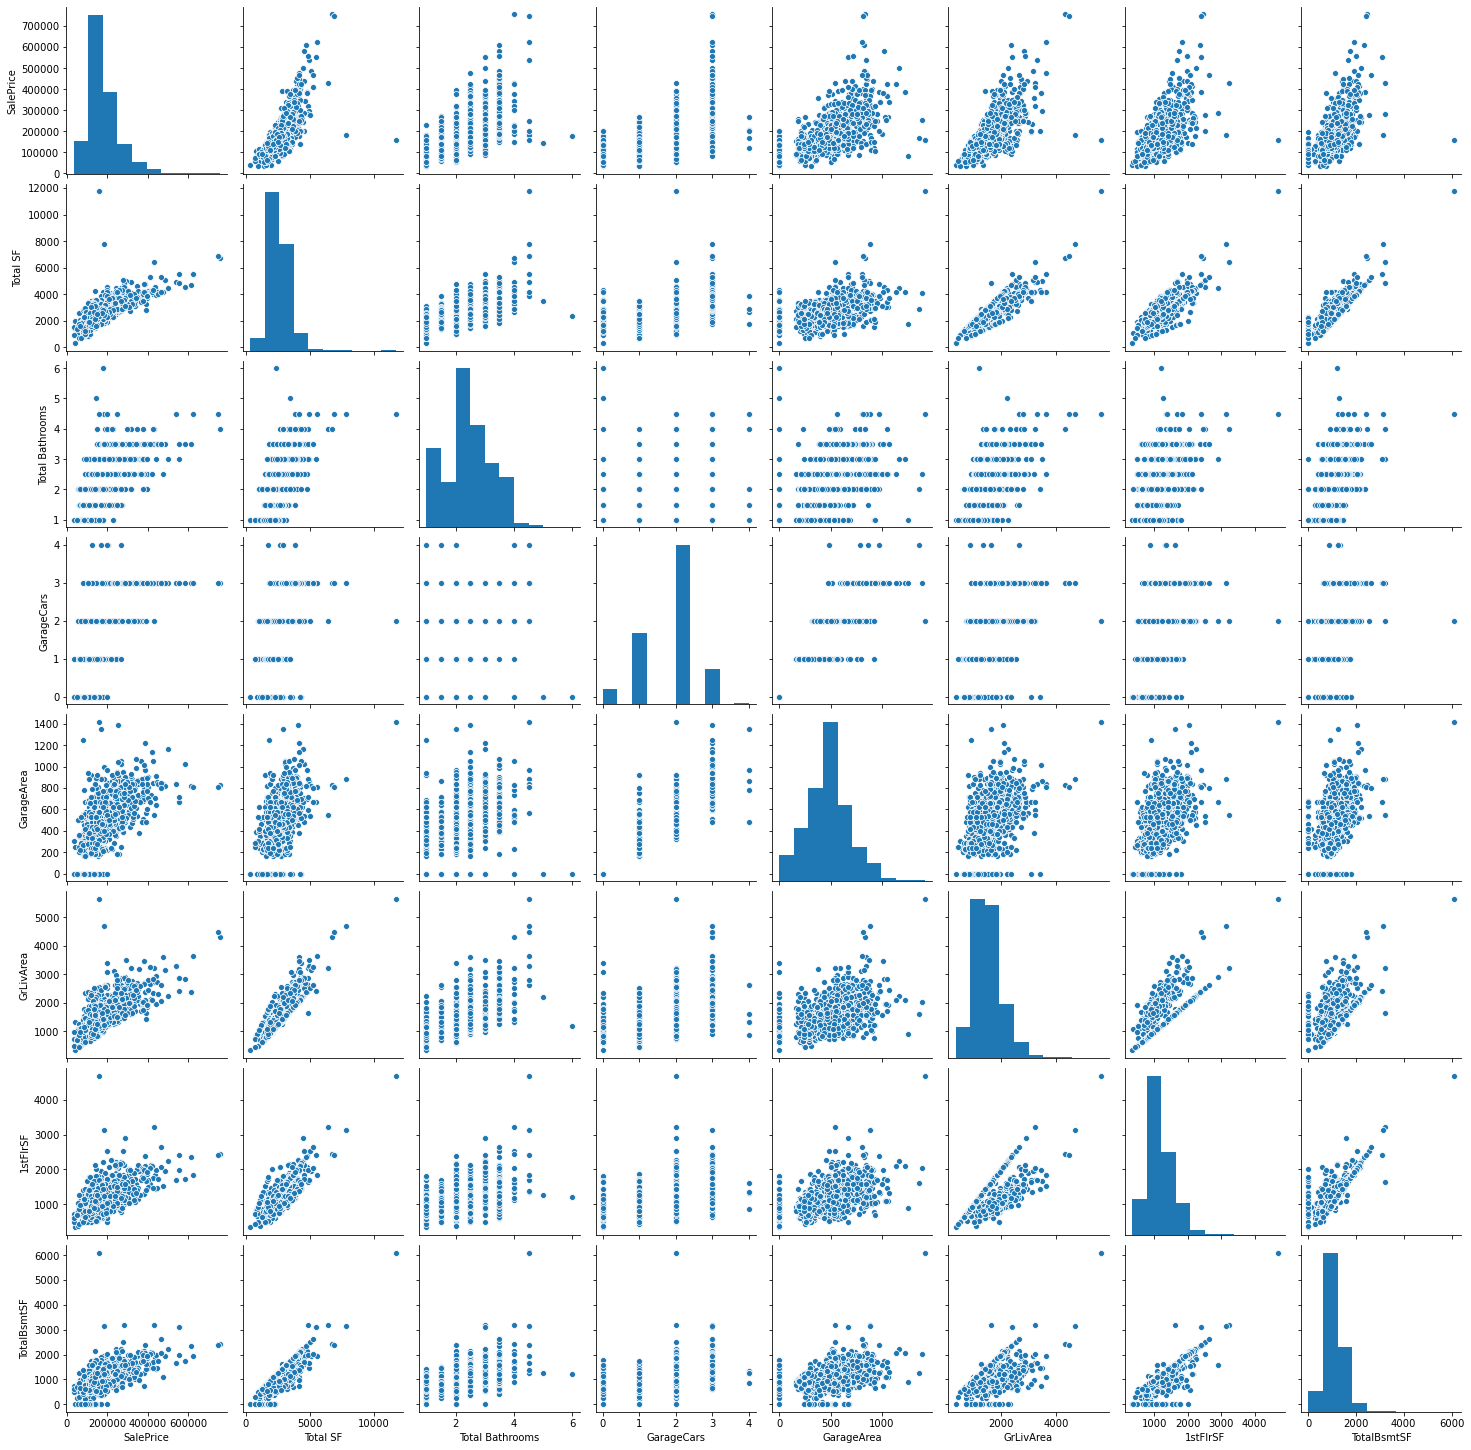

In [22]:
#correlation of SalePrice with variables using scatter plot
corr=['SalePrice','Total SF','Total Bathrooms',"GarageCars",'GarageArea', 'GrLivArea', '1stFlrSF', 'TotalBsmtSF']
sns.pairplot(house[corr])
plt.show()

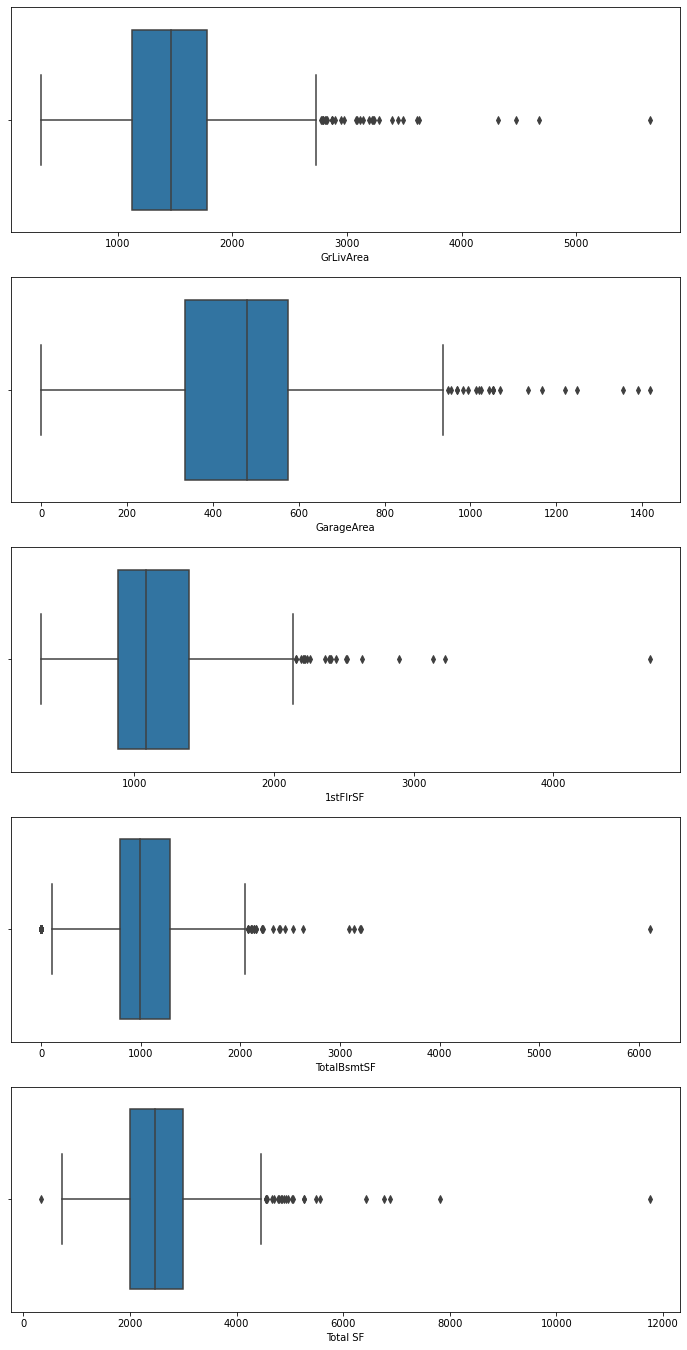

In [23]:
# checking for outliers and it's treatment
plt.figure(figsize=(12,24))

plt.subplot(5,1,1)
a=sns.boxplot(x=house['GrLivArea'])

plt.subplot(5,1,2)
a=sns.boxplot(x=house['GarageArea'])

plt.subplot(5,1,3)
a=sns.boxplot(x=house['1stFlrSF'])

plt.subplot(5,1,4)
a=sns.boxplot(x=house['TotalBsmtSF'])

plt.subplot(5,1,5)
a=sns.boxplot(x=house['Total SF'])

In [24]:
#removing outliers
house=house[house['GrLivArea']<4000]
house=house[house['GarageArea']<1200]
house=house[house['1stFlrSF']<3000]
house=house[house['TotalBsmtSF']<3000]
house=house[house['Total SF']<6000]

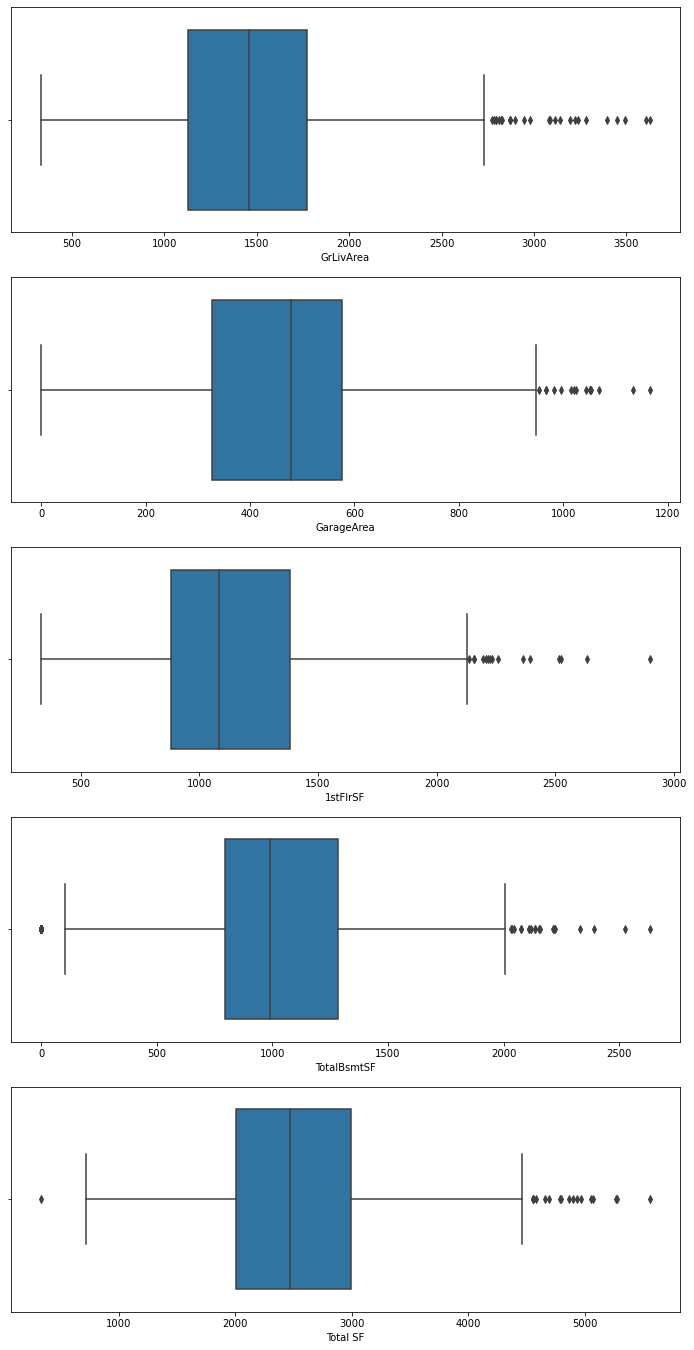

In [25]:
# Visualization using Box Plot
plt.figure(figsize=(12,24))

plt.subplot(5,1,1)
b=sns.boxplot(x=house['GrLivArea'])

plt.subplot(5,1,2)
b=sns.boxplot(x=house['GarageArea'])

plt.subplot(5,1,3)
b=sns.boxplot(x=house['1stFlrSF'])

plt.subplot(5,1,4)
b=sns.boxplot(x=house['TotalBsmtSF'])

plt.subplot(5,1,5)
b=sns.boxplot(x=house['Total SF'])


In [26]:
# Numerical Variables
numeric_data=house.select_dtypes(include=[np.number])
numeric_data

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,Total Bathrooms,Total SF
0,65.0,8450,196.0,706,0,150,856,856,854,0,...,0,61,0,0,0,0,0,208500,3.5,2566
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,...,298,0,0,0,0,0,0,181500,2.5,2524
2,68.0,11250,162.0,486,0,434,920,920,866,0,...,0,42,0,0,0,0,0,223500,3.5,2706
3,60.0,9550,0.0,216,0,540,756,961,756,0,...,0,35,272,0,0,0,0,140000,2.0,2473
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,...,192,84,0,0,0,0,0,250000,3.5,3343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,0.0,0,0,953,953,953,694,0,...,0,40,0,0,0,0,0,175000,2.5,2600
1456,85.0,13175,119.0,790,163,589,1542,2073,0,0,...,349,0,0,0,0,0,0,210000,3.0,3615
1457,66.0,9042,0.0,275,0,877,1152,1188,1152,0,...,0,60,0,0,0,0,2500,266500,2.0,3492
1458,68.0,9717,0.0,49,1029,0,1078,1078,0,0,...,366,0,112,0,0,0,0,142125,2.0,2156


In [27]:
# Checking the shape
numeric_data.shape

(1449, 31)

In [28]:
num=list(numeric_data.columns)
num.remove('SalePrice')

In [29]:
X=house[num]
y=house['SalePrice']

# Creating dummy variables for categorical data

In [30]:
dummy_var=house.select_dtypes(exclude=[np.number])
dummy_var.shape

(1449, 50)

In [31]:
dummy_vars=list(dummy_var.columns)

In [32]:
dummy_var=pd.get_dummies(dummy_var,drop_first=True)
dummy_var.shape

(1449, 438)

In [33]:
dummy_var.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [34]:
house=pd.concat([house,dummy_var],axis=1)
house.shape

(1449, 519)

In [35]:
house.drop(dummy_vars,axis=1,inplace=True)
house.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,196.0,706,0,150,856,856,854,0,...,0,0,0,0,1,0,0,0,1,0
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,...,0,0,0,0,1,0,0,0,1,0
2,68.0,11250,162.0,486,0,434,920,920,866,0,...,0,0,0,0,1,0,0,0,1,0
3,60.0,9550,0.0,216,0,540,756,961,756,0,...,0,0,0,0,1,0,0,0,0,0
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,...,0,0,0,0,1,0,0,0,1,0


<!--Splitting the Data into Train and Test-->

# Splitting the dataset into training and testing set

In [36]:
X_train,X_test=train_test_split(house,train_size=0.7,test_size=0.3,random_state=100)

In [37]:
# Rescaling numerical variables
scaler=MinMaxScaler()
X_train[num] = scaler.fit_transform(X_train[num])
y_train = X_train.pop('SalePrice')

In [38]:
X_test[num]=scaler.transform(X_test[num])
y_test=X_test.pop('SalePrice')

In [39]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1014, 468), (435, 468), (1014,), (435,))

# Model Building and Evaluation


## RIDGE Regression

In [40]:
#list of the alphas to tune
params={'alpha': [0.0001,0.001,0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,20,50,100,500,1000]}
ridge=Ridge()

# Cross Validation
folds=5
ridge_cv = GridSearchCV(estimator=ridge,param_grid=params,scoring='r2',cv=folds,return_train_score=True,verbose=1)
ridge_cv.fit(X_train,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:   10.8s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [41]:
crv=pd.DataFrame(ridge_cv.cv_results_)
crv=crv[crv['param_alpha']<=200]
crv.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.152513,0.185139,0.018788,0.009782,0.0001,{'alpha': 0.0001},0.776084,0.854601,0.873652,0.846442,...,0.822880,0.044363,26,0.974381,0.968959,0.974824,0.971417,0.973060,0.972528,0.002143
1,0.052966,0.008167,0.014193,0.002314,0.001,{'alpha': 0.001},0.777572,0.857237,0.874008,0.847165,...,0.824521,0.043791,25,0.974381,0.968957,0.974824,0.971417,0.973058,0.972527,0.002144
2,0.048581,0.007391,0.011384,0.002872,0.01,{'alpha': 0.01},0.788858,0.871957,0.877226,0.852909,...,0.835579,0.039765,23,0.974358,0.968877,0.974804,0.971395,0.972987,0.972484,0.002161
3,0.040976,0.008313,0.008799,0.002225,0.05,{'alpha': 0.05},0.812842,0.887677,0.886847,0.867822,...,0.855614,0.031791,22,0.974110,0.968430,0.974551,0.971146,0.972559,0.972159,0.002219
4,0.060167,0.010218,0.017988,0.004602,0.1,{'alpha': 0.1},0.826137,0.893659,0.893585,0.877602,...,0.866540,0.027705,21,0.973724,0.967943,0.974100,0.970729,0.972043,0.971708,0.002238


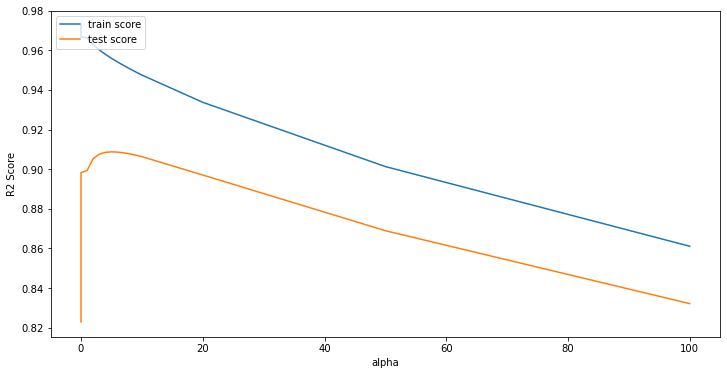

In [42]:
# plotting mean test and train scores with alpha 
plt.figure(figsize=(12,6))

crv['param_alpha']=crv['param_alpha'].astype('int32')

# plotting
plt.plot(crv['param_alpha'], crv['mean_train_score'])
plt.plot(crv['param_alpha'], crv['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2 Score')
plt.legend(['train score', 'test score'],loc='upper left')
plt.show()

In [43]:
ridge_cv.best_score_

0.9087394398800628

In [44]:
ridge_cv.best_params_

{'alpha': 5.0}

In [45]:
# Optimal value is 5
alpha=5
ridge=Ridge(alpha=alpha)
ridge.fit(X_train,y_train)

Ridge(alpha=5)

In [46]:
y_train_pred=ridge.predict(X_train)
print("Training set r2 score:" ,r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred=ridge.predict(X_test)
print("Test set r2 score:",r2_score(y_true=y_test, y_pred=y_test_pred))

Training set r2 score: 0.9536964080483874
Test set r2 score: 0.8835914704189932


In [47]:
# Optimal value is 10
alpha=10
ridge=Ridge(alpha=alpha)
ridge.fit(X_train,y_train)

Ridge(alpha=10)

In [48]:
y_train_pred=ridge.predict(X_train)
print("Training set r2 score:", r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred=ridge.predict(X_test)
print("Test set r2 score:", r2_score(y_true=y_test, y_pred=y_test_pred))

Training set r2 score: 0.9467159463880558
Test set r2 score: 0.8818476728969055


# LASSO Regression

In [49]:
lasso = Lasso()

# cross validation
lasso_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:  1.1min finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [50]:
crv =pd.DataFrame(lasso_cv.cv_results_)
crv.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.601661,0.084041,0.008592,0.002252,0.0001,{'alpha': 0.0001},0.780500,0.859261,0.865500,0.841397,...,0.829733,0.033106,25,0.974379,0.968906,0.974819,0.971402,0.972979,0.972497,0.002157
1,0.580468,0.054821,0.008799,0.002645,0.001,{'alpha': 0.001},0.780562,0.859150,0.865777,0.841398,...,0.829593,0.033285,27,0.974379,0.968906,0.974819,0.971402,0.972978,0.972497,0.002157
2,0.639837,0.047714,0.008989,0.002097,0.01,{'alpha': 0.01},0.781161,0.858870,0.868355,0.841544,...,0.829705,0.034085,26,0.974379,0.968906,0.974819,0.971402,0.972978,0.972497,0.002157
3,0.634233,0.058948,0.010797,0.003063,0.05,{'alpha': 0.05},0.783273,0.861542,0.871887,0.840630,...,0.828716,0.037288,28,0.974379,0.968904,0.974818,0.971401,0.972974,0.972495,0.002157
4,0.561680,0.062767,0.008596,0.000489,0.1,{'alpha': 0.1},0.785764,0.863578,0.873598,0.840873,...,0.829987,0.037492,24,0.974377,0.968900,0.974816,0.971399,0.972969,0.972492,0.002158


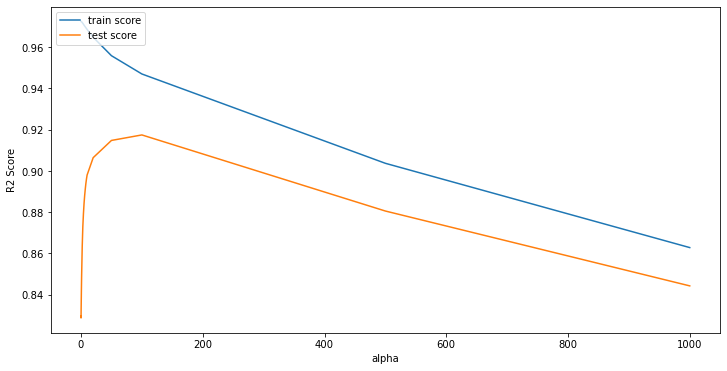

In [51]:
plt.figure(figsize=(12,6))
crv['param_alpha']=crv['param_alpha'].astype('float32')
# Visualization
plt.plot(crv['param_alpha'],crv['mean_train_score'])
plt.plot(crv['param_alpha'],crv['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2 Score')
plt.legend(['train score','test score'],loc='upper left')
plt.show()


In [52]:
lasso_cv.best_score_

0.9174750987931679

In [53]:
lasso_cv.best_params_

{'alpha': 100}

In [54]:
# optimal value = 100
alpha=100
lasso=Lasso(alpha=alpha)
lasso.fit(X_train,y_train)

Lasso(alpha=100)

In [55]:
# Checking the r2 score
y_train_pred=lasso.predict(X_train)
print("Training set r2 score:", r2_score(y_true=y_train,y_pred=y_train_pred))
y_test_pred=lasso.predict(X_test)
print("Test set r2 score:", r2_score(y_true=y_test,y_pred=y_test_pred))

Training set r2 score: 0.9438499881437824
Test set r2 score: 0.8901862148225264


In [56]:
# Optimal value is 200
alpha=200
lasso=Lasso(alpha=alpha)
lasso.fit(X_train,y_train)

Lasso(alpha=200)

In [57]:
#Checking r2 score
y_train_pred=lasso.predict(X_train)
print("Training set r2 score:", r2_score(y_true=y_train,y_pred=y_train_pred))
y_test_pred=lasso.predict(X_test)
print("Test set r2 score:", r2_score(y_true=y_test,y_pred=y_test_pred))

Training set r2 score: 0.9319109102705608
Test set r2 score: 0.8865098998460733


**From above we can conclude that Lasso and Ridge have almost same R2 scores**

In [58]:
coef=pd.Series(lasso.coef_,index=X_train.columns)
var_selected=sum(coef!=0)
print('Lasso has selected {} variables'.format(var_selected))

Lasso has selected 88 variables


In [59]:
# Using Lasso Regression the predicted variables for housing prices
main_coef=pd.concat([coef.sort_values().head(10),coef.sort_values().tail(10)])
main_coef.sort_values(ascending=False)

Total SF                131248.906995
GrLivArea                58453.597374
OverallQual_10           56087.387474
OverallQual_9            51640.951109
SaleType_New             32093.967030
Neighborhood_StoneBr     23138.918002
BsmtFinSF1               21093.397734
GarageCars               21075.227687
OverallQual_8            20182.820817
GarageArea               19149.396083
OverallQual_4            -7578.086659
KitchenQual_Fa           -7823.671432
KitchenQual_Gd           -9460.635676
OverallQual_5            -9893.759463
BsmtQual_Gd             -10553.812107
OverallCond_4           -10624.203188
KitchenQual_TA          -11966.209601
BsmtQual_TA             -12214.242643
KitchenAbvGr            -14413.089385
OverallCond_3           -16450.437449
dtype: float64

Text(0.5, 1.0, 'Coefficients in the Lasso Model')

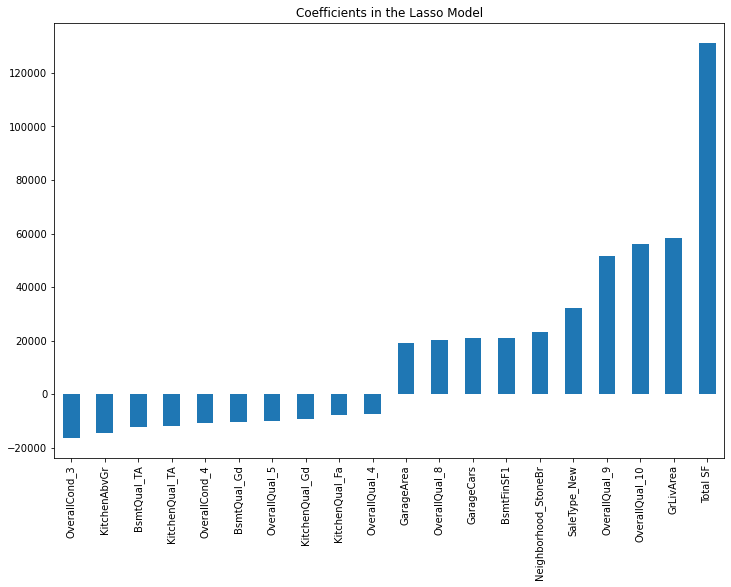

In [60]:
# Visualization
plt.figure(figsize=(12,8))
main_coef.plot(kind="bar")
plt.title("Coefficients in the Lasso Model")

# Conclusion:

## The most significant variables in prediction of house prices are-:

**=> Total SF(Total Square Fit)**

**=> GrLivArea**

**=> OverallQual**

**=> LotArea**

**=> RoofMatl**

    => WdShngl(Wood Shingles)
    
**=> Neighborhood**

    => StoneBr(Stone Brook)
    
**=> SaleType(Type of Sale)**

    => New(Home just constructed and sold)
    
**=> GarageCars**

